In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


def change_obj_to_category(df):
    i=0;
    while i<df.columns.size:
        if (df.dtypes[df.columns[i]] == 'object' or df.dtypes[df.columns[i]] == 'bool'):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('category')
        i = i+1  
        
def change_int_to_float(df):
    i=0;
    while i<df.columns.size:
        if 'int' in str(df.dtypes[df.columns[i]]):
            col = df.dtypes.index[i]
            df[col] = df[col].astype('float64')
        i = i+1
        
def score_model(model,X,Y,scoring='accuracy'):
    return model.score(X,Y)
        
        
def roc_score_model(model,X,Y):
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(Y,pd.DataFrame((model.predict_proba(X)))[1].tolist())

def feature_imp(colNames,imps):
    df = pd.DataFrame(columns=('Feature','Importance'),index=[x for x in range(0,len(colNames))])
    i = 0
    for col in colNames:
        df['Feature'][i] = col
        df['Importance'][i] = imps[i]
        i=i+1
    
    df = df.sort_values(by='Importance',ascending=False)
    return df

def predict_th(model,tx,ty,threshold=0.5):
    import pandas as pd
    probs = model.predict_proba(tx)[:,1].tolist()
    predictions = []
    for i in range(0,len(ty)):
        if probs[i]>threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    
    return predictions   


def generateXY(df,target_col,var_list):
    
    #make a copy of the required subset and drop rows containing Na
    mdata = df[var_list+[target_col]]
    mdata.dropna(inplace=True)
    
    #Separate target and put it in Y
    Y = mdata[target_col].tolist()
    del mdata[target_col]
    
    #Now, process data and create dummy variables if required with final data in Xvars
    import pandas
    Xvars = pandas.DataFrame()
    import pandas as pd
    for cols in var_list:
        if (str(mdata[cols].dtype) == 'category'):
            dummySer= pd.get_dummies(mdata[cols],prefix=cols+'_')
            Xvars = pd.concat([Xvars,dummySer],axis=1)
        else:
            Xvars =  pd.concat([Xvars,mdata[cols]],axis=1)
    
    X = Xvars
    
    return X,Y 

In [4]:
import pandas as pd
import numpy as np
print('Starting data read from csv file.')
bank = pd.read_csv('bank_dataset.csv',sep=',')

Starting data read from csv file.


In [6]:
del bank['Unnamed: 0']

In [10]:
bank_past=bank.loc[bank['pastCam_exposed']==1]
bank_present=bank.loc[bank['pastCam_exposed']==0]

In [11]:
bank_past.shape

(5625, 21)

In [12]:
bank_present.shape

(35563, 21)

In [15]:
bank_present.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum', 'subscribe'], dtype='object')

In [16]:
bank_past.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'pastCam_numberOfContact', 'pastCam_result', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum', 'subscribe'], dtype='object')

In [14]:
del bank_present['pastCam_numberOfContact']
del bank_present['pastCam_result']
del bank_present['pastCam_exposed']
del bank_past['pastCam_exposed']

Present:

Logistic Regression CV precision Score: 0.569867885897
Naive Bayes CV precision Score: 0.374234079299
Random Forest CV precision Score: 0.503005896105
Gradient Boosting CV precision Score: 0.60649264397


Logistic Regression accuracy CV Score: 0.917785419931
Naive Bayes accuracy CV Score: 0.871458850771
Random Forest accuracy CV Score: 0.910861262747
Gradient Boosting accuracy CV Score: 0.921722206725


GBC Performance on Test
Accuracy Score: 0.926050892732


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[6355  130]
 [ 396  232]]


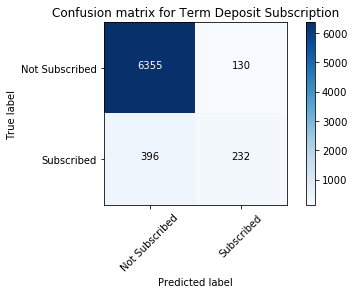

Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.63  0.37]]


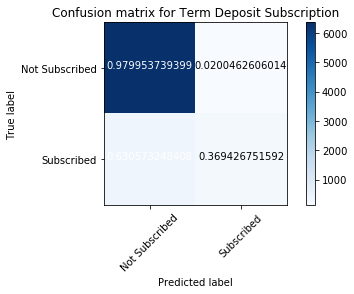



Feature Importances


,Feature,Importance
45,idx_euribor,0.302662
44,idx_confidence,0.128573
37,contactDuration__long_call,0.0807011
39,contactDuration__short_call,0.0739373
46,idx_employeesNum,0.0466318
43,idx_price,0.0348353
26,contactMethod__cellular,0.0206358
42,idx_employment,0.0202118
38,contactDuration__med_call,0.0201284
35,contactDay__tue,0.0166705


In [139]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_present[iv+[dv]]


change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=100000)
nb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kFold = 5

#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc.feature_importances_)

In [140]:
Train_X_present=Train_X
Train_Y_present=Train_Y
Test_X_present=Test_X
Test_Y_present=Test_Y

In [141]:
print(Train_X_present.shape)
print(Test_X_present.shape)

(28450, 47)
(7113, 47)


Lesser Variables Present

In [127]:
#Modelling
#Feature List                
iv = ['age', 'job', 'education', 'default', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_present[iv+[dv]]


change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=100000)
nb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kFold = 5

#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc.feature_importances_)

KeyboardInterrupt: 

In [ ]:
Train_X_past=Train_X
Train_Y_past=Train_Y
Test_X_past=Test_X
Test_Y_past=Test_Y

Past:


Logistic Regression CV precision Score: 0.720617092167
Naive Bayes CV precision Score: 0.55933454669
Random Forest CV precision Score: 0.686414243135
Gradient Boosting CV precision Score: 0.703022533299


Logistic Regression accuracy CV Score: 0.83600461098
Naive Bayes accuracy CV Score: 0.780891240606
Random Forest accuracy CV Score: 0.816445344308
Gradient Boosting accuracy CV Score: 0.83889029136


GBC Performance on Test
Accuracy Score: 0.844444444444


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[739  76]
 [ 99 211]]


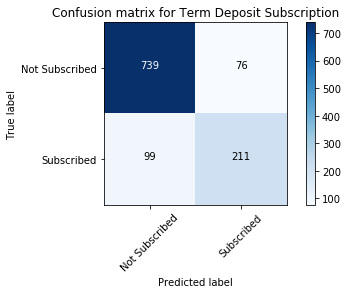

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.32  0.68]]


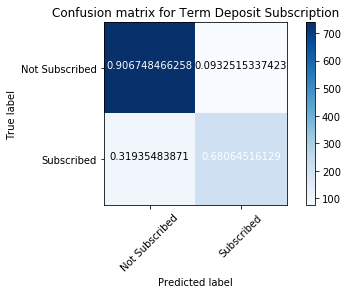



Feature Importances


,Feature,Importance
48,idx_euribor,0.289537
47,idx_confidence,0.080959
27,pastCam_result__failure,0.0643178
42,contactDuration__short_call,0.0605201
49,idx_employeesNum,0.0531956
28,pastCam_result__success,0.0449439
46,idx_price,0.0355495
40,contactDuration__long_call,0.0287509
4,age__60s+,0.0287212
31,contactMonth__Q1,0.0281653


In [143]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'pastCam_numberOfContact', 'pastCam_result','contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank_past[iv+[dv]]

change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=100000)
nb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kFold = 5

print("")
#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc.feature_importances_)

In [146]:
Train_X_past=Train_X
Train_Y_past=Train_Y
Test_X_past=Test_X
Test_Y_past=Test_Y

Full Model:


Logistic Regression CV precision Score: 0.702222044027
Naive Bayes CV precision Score: 0.537035129361
Random Forest CV precision Score: 0.626741388308
Gradient Boosting CV precision Score: 0.675187824669


Logistic Regression accuracy CV Score: 0.811999168998
Naive Bayes accuracy CV Score: 0.76377617613
Random Forest accuracy CV Score: 0.782222856242
Gradient Boosting accuracy CV Score: 0.818668557478


GBC Performance on Test
Accuracy Score: 0.814222222222


Confusion Matrix for GBC Test output
Confusion matrix, without normalization
[[736  79]
 [130 180]]


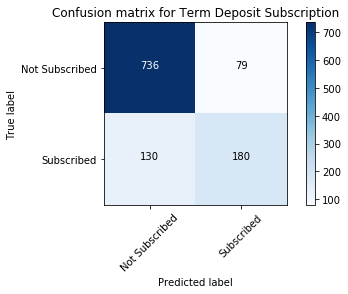

Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.42  0.58]]


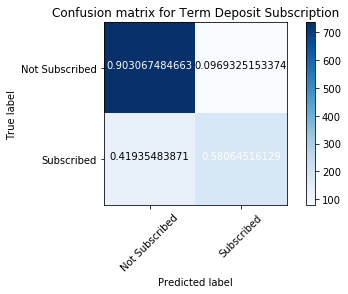



Feature Importances


,Feature,Importance
45,idx_euribor,0.316359
46,idx_employeesNum,0.102432
44,idx_confidence,0.0881066
39,contactDuration__short_call,0.0592644
43,idx_price,0.0467436
37,contactDuration__long_call,0.0351071
42,idx_employment,0.0275949
4,age__60s+,0.0252548
19,education__unknown,0.0201145
28,contactMonth__Q1,0.0189612


In [156]:
#Modelling
#Feature List                
iv = ['age', 'job', 'marital', 'education', 'default', 'housingLoan', 'personalLoan', 'contactMethod', 'contactMonth', 'contactDay', 'contactDuration', 'numberOfContact', 'idx_employment', 'idx_price', 'idx_confidence', 'idx_euribor', 'idx_employeesNum']
#Dependent Variable                      
dv = 'subscribe'

bank = bank[iv+[dv]]


change_obj_to_category(bank)
change_int_to_float(bank)


#Performing 80/20 split

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, train_size = 0.8,random_state=2135)
varToUse = iv
Train_X,Train_Y = generateXY(train_data,dv,varToUse)
Test_X,Test_Y = generateXY(test_data,dv,varToUse)

from sklearn import model_selection
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=100000)
nb = GaussianNB()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
kFold = 5

#print('LR')
cv_precision_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_lr = np.mean(model_selection.cross_val_score(lr, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('NB')
cv_precision_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_nb = np.mean(model_selection.cross_val_score(nb, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('RF')
cv_precision_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_rf = np.mean(model_selection.cross_val_score(rf, Train_X, Train_Y, cv=kFold,scoring='accuracy'))
#print('GBC')
cv_precision_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='precision'))
cv_accuracy_score_gbc = np.mean(model_selection.cross_val_score(gbc, Train_X, Train_Y, cv=kFold,scoring='accuracy'))

#1:
print('Logistic Regression CV precision Score: ' + str(cv_precision_score_lr))
print('Naive Bayes CV precision Score: ' + str(cv_precision_score_nb))
print('Random Forest CV precision Score: ' + str(cv_precision_score_rf))
print('Gradient Boosting CV precision Score: ' + str(cv_precision_score_gbc))

print ('\n')

print('Logistic Regression accuracy CV Score: ' + str(cv_accuracy_score_lr))
print('Naive Bayes accuracy CV Score: ' + str(cv_accuracy_score_nb))
print('Random Forest accuracy CV Score: ' + str(cv_accuracy_score_rf))
print('Gradient Boosting accuracy CV Score: ' + str(cv_accuracy_score_gbc))

from sklearn import metrics
#2 Precision and Recall.

print ('\n')
#GBC ON Test
print('GBC Performance on Test')
gbc.fit(Train_X,Train_Y)
#gbc_Pred = gbc.predict(Test_X)
print('Accuracy Score: ' + str(score_model(gbc,Test_X,Test_Y)))


print ('\n')
print ('Confusion Matrix for GBC Test output')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    np.set_printoptions(precision=2)
    plt.figure()
    import itertools    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure()
    plt.show()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(Test_Y, predict_th(gbc,Test_X,Test_Y,threshold=0.36))
cnf_matrix = confusion_matrix(Test_Y, gbc.predict(Test_X))
np.set_printoptions(precision=2)
plt.figure()
import itertools
plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'],
                      title='Confusion matrix for Term Deposit Subscription')
plt.figure()
plt.show()
# Plot normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Not Subscribed','Subscribed'], normalize=True,
                      title='Confusion matrix for Term Deposit Subscription')

plt.show()

print ('\n')
print('Feature Importances')
feature_imp(Train_X.columns,gbc.feature_importances_)

In [157]:
Train_X_full=Train_X
Train_Y_full=Train_Y
Test_X_full=Test_X
Test_Y_full=Test_Y

In [158]:
len(Test_X_full)

1125

Present::

In [142]:
mn=gbc.predict_proba(Test_X_present)
Test=Test_X_present
Test['prob']=m
Test['subscribe']=Test_Y_present
test_pred=Test.sort_index(by=['prob'], ascending=[False])
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['prob']>=0.5 and r['subscribe']>0) or (r['prob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


0.6272855133614628
0.6772151898734177
0.7655883731833099
0.8179261862917399
0.8523622047244095
0.8769627372861495
0.8943562964450693
0.9075571177504393
0.9178253397906577
0.9260508927316181


Past:

In [151]:
mn=gbc.predict_proba(Test_X_past)
Test=Test_X_past
Test['prob']=mn
Test['subscribe']=Test_Y_past
test_pred=Test.sort_index(by=['prob'], ascending=[False])
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['prob']>=0.5 and r['subscribe']>0) or (r['prob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))

ValueError: Wrong number of items passed 2, placement implies 1

In [150]:
len(Test)

1125

In [ ]:
Full:

In [ ]:
mn=gbc.predict_proba(Test_X_past)
Test=Test_X_past
Test['prob']=mn
Test['subscribe']=Test_Y_past
test_pred=Test.sort_index(by=['prob'], ascending=[False])
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['prob']>=0.5 and r['subscribe']>0) or (r['prob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))

In [76]:
n=0
mn_p=[]
for i in range(len(m)):
    if m[i]<=0.5:
        mn_p.append(0)
    else:
        mn_p.append(1)

In [79]:
Test_X['pob']=mn_p

In [80]:
Test=Test_X
Test['pob']=m
Test['subscribe']=Test_Y

In [82]:
Test['pob']=m

In [84]:
Test['subscribe']=Test_Y

In [63]:
gbc.predict(Test_X)

array([ 0.,  0.,  0., ...,  0.,  0.,  1.])

In [62]:
gbc.predict_proba(Test_X)


array([[ 0.72,  0.28],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       ..., 
       [ 0.78,  0.22],
       [ 0.99,  0.01],
       [ 0.45,  0.55]])

In [91]:
Test

,age__10-20s,age__30s,age__40s,age__50s,age__60s+,job__admin.,job__blue-collar,job__low_earning,job__management,job__self-employed,job__services,job__technician,marital__married,marital__other,marital__single,education__basic,education__high.school,education__professional.course,education__university.degree,education__unknown,default__no,default__unknown,housingLoan__no,housingLoan__yes,personalLoan__no,personalLoan__yes,contactMethod__cellular,contactMethod__telephone,contactMonth__Q1,contactMonth__Q2,contactMonth__Q3,contactMonth__Q4,contactDay__fri,contactDay__mon,contactDay__thu,contactDay__tue,contactDay__wed,contactDuration__long_call,contactDuration__med_call,contactDuration__short_call,numberOfContact__1to3,numberOfContact__4+,idx_employment,idx_price,idx_confidence,idx_euribor,idx_employeesNum,pob,subscribe
4677,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1.1,93.994,-36.4,4.858,5191.0,0.276604,1.0
294,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0.002714,0.0
12308,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1.4,93.918,-42.7,4.959,5228.1,0.003389,0.0
16237,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1.4,93.918,-42.7,4.961,5228.1,0.003282,0.0
4466,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1.1,93.994,-36.4,4.856,5191.0,0.002575,0.0
16811,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1.4,93.918,-42.7,4.962,5228.1,0.002860,0.0
35577,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,-1.8,92.893,-46.2,1.244,5099.1,0.014652,0.0
8519,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1.4,94.465,-41.8,4.864,5228.1,0.002829,0.0
8889,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1.4,94.465,-41.8,4.866,5228.1,0.034694,0.0
18745,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1.4,93.918,-42.7,4.968,5228.1,0.490953,0.0


In [93]:
test_pred=Test.sort_index(by=['pob'], ascending=[False])

/Users/ashokvardhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [119]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [121]:
for i in range(1,11):
    top = test_pred[:int(len(test_pred)*0.1*i)]
    p=0
    for i,r in top.iterrows():
        if (r['pob']>=0.5 and r['subscribe']>0) or (r['pob']<0.5 and r['subscribe']<1):
            p+=1
    print(p/len(top))

0.6272855133614628
0.6772151898734177
0.7655883731833099
0.8179261862917399
0.8523622047244095
0.8769627372861495
0.8943562964450693
0.9075571177504393
0.9178253397906577
0.9260508927316181


In [124]:
len(test_pred)

7113

In [100]:
top10 = test_pred[:int(len(test_pred)*0.1)]

for i 
top10.subscribe.sum()/len(top10)

0.5161744022503516

In [114]:
p=0
for i,r in top10.iterrows():
    if (r['pob']>=0.5 and r['subscribe']>0) or (r['pob']<0.5 and r['subscribe']<1):
        p+=1

In [115]:
p

446

In [112]:
len(top10)

711

In [113]:
p/len(top10)

0.6272855133614628

In [116]:
top10.pob.describe()

count    711.000000
mean       0.542168
std        0.126931
min        0.380320
25%        0.449083
50%        0.503366
75%        0.625439
max        0.918147
Name: pob, dtype: float64